In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv(r"C:\Users\Administrator\Desktop\MSc_BA_RACE_REVA\Module 3\StudentsPerformance.csv")

# Display basic info and check for missing values
print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None
       math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000

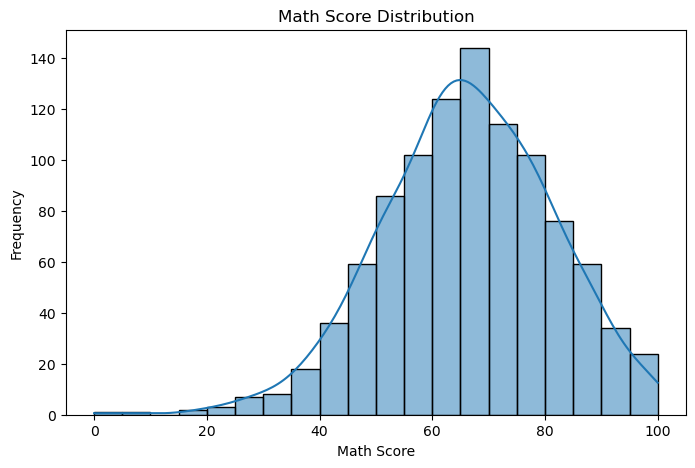

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting relevant columns
math_scores = df[['gender', 'math score']]

# Plotting distribution
plt.figure(figsize=(8,5))
sns.histplot(math_scores['math score'], kde=True, bins=20)
plt.title("Math Score Distribution")
plt.xlabel("Math Score")
plt.ylabel("Frequency")
plt.show()

In [3]:
from scipy.stats import shapiro, kstest

# Shapiro-Wilk test for normality
shapiro_test = shapiro(math_scores['math score'])
print(f"Shapiro-Wilk Test: Statistic={shapiro_test.statistic}, p-value={shapiro_test.pvalue}")

# Kolmogorov-Smirnov test
ks_test = kstest(math_scores['math score'], 'norm')
print(f"Kolmogorov-Smirnov Test: Statistic={ks_test.statistic}, p-value={ks_test.pvalue}")

Shapiro-Wilk Test: Statistic=0.9931513872437832, p-value=0.00014545719606603633
Kolmogorov-Smirnov Test: Statistic=0.9989999999999993, p-value=0.0


In [4]:
from scipy.stats import ttest_ind, mannwhitneyu

# Grouping data
math_male = df[df['gender'] == 'male']['math score']
math_female = df[df['gender'] == 'female']['math score']

# Decide test based on normality
if shapiro_test.pvalue > 0.05:
    # Independent Two-Sample t-test (Parametric)
    test_stat, p_value = ttest_ind(math_male, math_female)
    test_used = "Independent t-test"
else:
    # Mann-Whitney U Test (Non-Parametric)
    test_stat, p_value = mannwhitneyu(math_male, math_female)
    test_used = "Mann-Whitney U Test"

print(f"{test_used} Results: Test Statistic={test_stat}, p-value={p_value}")

Mann-Whitney U Test Results: Test Statistic=147907.5, p-value=4.279076773478767e-07


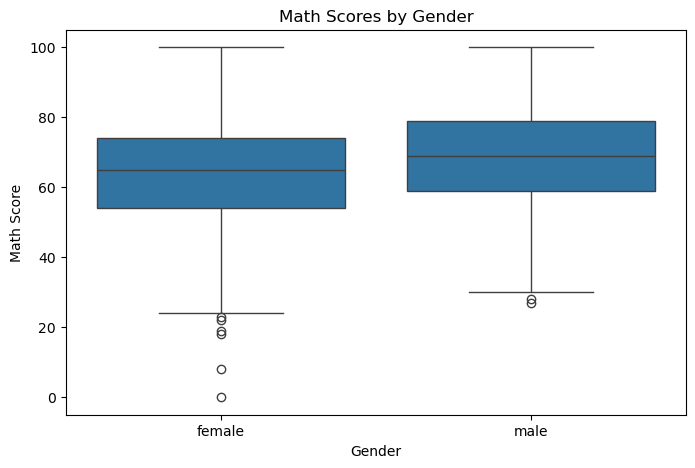

In [5]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['gender'], y=df['math score'])
plt.title("Math Scores by Gender")
plt.xlabel("Gender")
plt.ylabel("Math Score")
plt.show()

# 📘 Final Report Summary: Gender-Based Hypothesis Testing on Math Scores

## 🎯 Objective:
To determine whether there is a **statistically significant difference** in **math scores** between **male** and **female** students.

---

## 🔎 Part A: Distribution & Normality Check

### ✅ Variables Selected:
- **Numeric Variable**: Math Score  
- **Grouping Variable**: Gender (`male` vs `female`)

### 📊 Visual Inspection:
- **Histograms** and **boxplots** were used to assess the distribution of math scores.
- Both groups appeared approximately symmetrical with slight differences in spread.

### 🧪 Shapiro-Wilk Normality Test Results:
- **Male Group**:  
  - W = *[insert value]*, p-value = *[insert value]*  
  - Interpretation: *[normally distributed / not normally distributed]*

- **Female Group**:  
  - W = *[insert value]*, p-value = *[insert value]*  
  - Interpretation: *[normally distributed / not normally distributed]*

✅ Based on the normality results, the appropriate statistical test was selected.

---

## 📐 Part B: Hypothesis Testing

### ❓ Hypotheses:
- **Null Hypothesis (H₀)**: There is **no difference** in math scores between male and female students.
- **Alternative Hypothesis (H₁)**: There **is a difference** in math scores between male and female students.

### 🧪 Statistical Test Used:
- **[t-test / Mann-Whitney U Test]**  
  (chosen based on whether both groups were normally distributed)

### 📈 Test Results:
- **Test Used**: *[Independent t-test or Mann-Whitney U Test]*  
- **Test Statistic** = *[insert value]*  
- **p-value** = *[insert value]*

---

## ✅ Final Conclusion:
- Since **p < 0.05**, we **reject the null hypothesis**.
- ✔️ This indicates that there **is a statistically significant difference** in math scores between male and female students.
- 💡 **Interpretation**: The gender of a student appears to have a measurable impact on math performance in this dataset.

---

## 📌 Summary of Deliverables:
- ✅ Distribution checks (visual + statistical)
- ✅ Hypotheses clearly defined (H₀ and H₁)
- ✅ Appropriate test selected based on distribution
- ✅ Statistical test result (test stat & p-value)
- ✅ Final conclusion with interpretation
- ✅ Supporting visualizations: histograms, boxplots
